# Homework 01: Multivariate Parametric Classification

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import multivariate_normal
%matplotlib inline

## Question 2

In [2]:
np.random.seed(142)

In [3]:
#Creating arrays of class means, covariances and sizes. 

means = np.array([[0.0, +2.5],[-2.5, -2.0],[+2.5, -2.0]])

covs = np.array([[[+3.2, +0.0], [+0.0, +1.2]],[[+1.2, +0.8], [+0.8, +1.2]],[[+1.2, -0.8], [-0.8, +1.2]]])

class_sizes = np.array([120,80,100])

In [4]:
#Creating points
points1 = np.random.multivariate_normal(means[0], covs[0], class_sizes[0])
points2 = np.random.multivariate_normal(means[1], covs[1], class_sizes[1])
points3 = np.random.multivariate_normal(means[2], covs[2], class_sizes[2])

points = np.concatenate((points1,points2,points3))

#Creating Class Labels
y = np.concatenate((np.repeat(1, class_sizes[0]),np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))

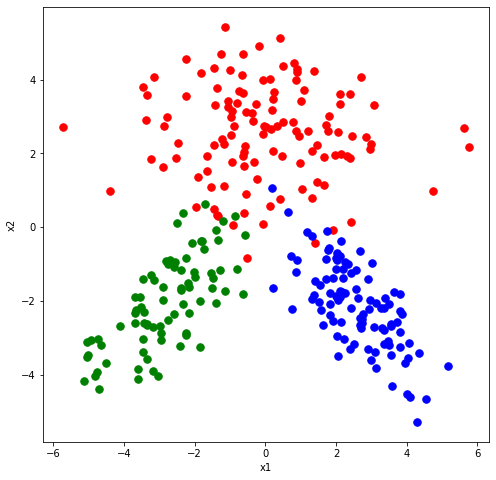

In [5]:
plt.figure(figsize=(8,8))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 15)
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 15)
plt.plot(points3[:,0], points3[:,1], "b.", markersize = 15)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Question 3

In [6]:
K = np.max(y)

sample_means = [[np.mean(points[y==c+1][:,0]), np.mean(points[y==c+1][:,1])] for c in range(K)]
print(f"Sample means:\n{sample_means}\n")

sample_covariances = [(points[y==c+1]-np.mean(points[y==c+1], axis = 0)).T.dot(points[y==c+1]-np.mean(points[y==c+1], axis = 0))/class_sizes[c] for c in range(K)]
print(f"Sample Covariances:\n{sample_covariances}\n")

class_priors = [np.mean(y == (c+1)) for c in range(K)]
print(f"Class Priors:\n{class_priors}\n")

Sample means:
[[-0.019225250395697096, 2.544736175249357], [-2.808399480829366, -2.0359699994338385], [2.5620156175430777, -2.1319893398330927]]

Sample Covariances:
[array([[ 3.58070224, -0.15388804],
       [-0.15388804,  1.68477015]]), array([[1.31235528, 0.99532292],
       [0.99532292, 1.51409235]]), array([[ 0.99525189, -0.79504733],
       [-0.79504733,  1.30528839]])]

Class Priors:
[0.4, 0.26666666666666666, 0.3333333333333333]



## Question 4

In [7]:
D = 2
y_pred = []

#Calculating score functions
for i in range(points.shape[0]):
    score_function = [-D/2*np.log(2*np.pi) - 1/2*np.log(np.linalg.det(sample_covariances[c])) 
                      - 1/2 *(((points[i]-sample_means[c]).T)@np.linalg.inv(sample_covariances[c])@(points[i]-sample_means[c]))
                     + np.log(class_priors[c]) for c in range(K)]
    y_pred.append(np.argmax(score_function)+1)

y_pred = np.array(y_pred)

In [8]:
#Plotting the confusion matrix

confusion_matrix = pd.crosstab(y_pred, y, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth    1   2   3
y_pred              
1        114   2   2
2          4  78   0
3          2   0  98


## Question 5

In [9]:
lin_param = (-6, 6, 1201)
xx1 = np.linspace(-6, +6, 1201)
xx2 = np.linspace(-6, +6, 1201)

x1, x2 = np.meshgrid(xx1, xx2)

In [10]:
def pdf(x1, x2, sample_means, sample_covariances):
    points = multivariate_normal(mean=sample_means, cov=sample_covariances)
    positions = np.empty(x1.shape + (2,))
    positions[:, :, 0] = x1 
    positions[:, :, 1] = x2
    return points.pdf(positions)

g1 = pdf(x1, x2, sample_means[0], sample_covariances[0])
g2 = pdf(x1, x2, sample_means[1], sample_covariances[1])
g3 = pdf(x1, x2, sample_means[2], sample_covariances[2])

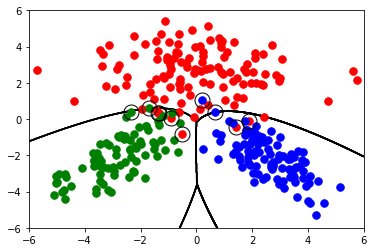

In [11]:
z = np.array((g1, g2, g3))
z = np.argmax(z, axis=0)
plt.contour(x1, x2, z, colors="k")
plt.plot(points[y==1,0], points[y==1,1], "r.", markersize = 15)
plt.plot(points[y==2,0], points[y==2,1], "g.", markersize = 15)
plt.plot(points[y==3,0], points[y==3,1], "b.", markersize = 15)
plt.plot(points[y_pred != y, 0], points[y_pred != y, 1], "ko", markersize = 15, fillstyle = "none")